In [23]:
import pandas as pd
import numpy as np
from graphdatascience import GraphDataScience # Load neo4j graph data science library
import os

if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [24]:
# Connect to a Neo4j instance (assumes local right now)
NEO4J_URI = os.environ.get("NEO4J_URI", "bolt://localhost:7687")
NEO4J_AUTH = None
NEO4J_DB = os.environ.get("NEO4J_DB", "neo4j")
if os.environ.get("NEO4J_USER") and os.environ.get("NEO4J_PASSWORD"):
    NEO4J_AUTH = (
        os.environ.get("NEO4J_USER"),
        os.environ.get("NEO4J_PASSWORD"),
    )
else:
    NEO4J_AUTH = ("neo4j", "Bookings")
gds = GraphDataScience(NEO4J_URI, auth=NEO4J_AUTH, database=NEO4J_DB)

In [36]:
# Embedding dimension for properties
# Get the projection
if 'properties-embedding' in gds.graph.list().graphName.values:
    gds.graph.drop("properties-embedding")

# We can embed all property information since that is not what we're trying to predict
gds.graph.project("properties-embedding",
                  node_spec=['Property', 'City', 'Country', 'Type'],
                  relationship_spec={'LOCATED_IN': {"orientation":'UNDIRECTED'},
                                     'HAS_TYPE': {"orientation": 'UNDIRECTED'}})


# Run the FastRP algorithm to generate embeddings
gds.fastRP.write(
    gds.graph.get("properties-embedding"),
    randomSeed = 123,
    embeddingDimension = 4,
    writeProperty = "property_embedding"
)

nodeCount                                                             1020
nodePropertiesWritten                                                 1020
preProcessingMillis                                                      0
computeMillis                                                            9
writeMillis                                                             59
configuration            {'writeProperty': 'property_embedding', 'rando...
Name: 0, dtype: object

In [37]:
gds.run_cypher("""
MATCH (t:Type)<-[:HAS_TYPE]-(p:Property)-[:LOCATED_IN]->(cty:City)-[:LOCATED_IN]->(c:Country)
RETURN DISTINCT cty.name, c.name, t.name, p.property_embedding
""")

,cty.name,c.name,t.name,p.property_embedding
0,Naples,ITALY,condo,"[-0.20166224241256714, 0.43832412362098694, 1...."
1,Naples,ITALY,house,"[0.39120832085609436, 0.2369781732559204, 1.44..."
2,Naples,ITALY,apartment,"[0.6782804727554321, 0.5323934555053711, 1.339..."
3,Rome,ITALY,condo,"[-0.8090322613716125, 0.8607339859008789, 1.35..."
4,Rome,ITALY,house,"[0.4916251599788666, 0.4703197181224823, 1.547..."
5,Rome,ITALY,apartment,"[1.2980865240097046, 0.4543336033821106, 0.885..."
6,Milan,ITALY,house,"[0.9640467166900635, -0.8010208010673523, 0.86..."
7,Milan,ITALY,condo,"[-0.20823362469673157, -0.46109819412231445, 0..."
8,Milan,ITALY,apartment,"[1.4544421434402466, -0.29288366436958313, 0.1..."
9,Lyon,FRANCE,house,"[0.9640418291091919, -0.4811059236526489, 1.17..."


In [110]:
# Look at the embedding outputs
gds.run_cypher("MATCH (p:Property) RETURN p.id, p.property_embedding LIMIT 5")

,p.id,p.property_embedding
0,0,"[0.9590740203857422, 0.028162360191345215, 0.3..."
1,1,"[0.9590740203857422, 0.028162360191345215, 0.3..."
2,2,"[0.7633485198020935, -0.978816032409668, -0.02..."
3,3,"[-0.44362467527389526, -1.3298790454864502, 1...."
4,4,"[1.377355694770813, -0.29666516184806824, -0.1..."


In [27]:
property_results = gds.run_cypher("""
MATCH (t:Type)<-[:HAS_TYPE]-(p:Property)-[:LOCATED_IN]->(c:City)-[:LOCATED_IN]->(co:Country)
RETURN p.id, t.name, p.property_embedding, c.name, co.name
""")

In [28]:
property_results['KEY'] = property_results[['co.name', 'c.name']].apply(lambda x: '|'.join(x), axis=1)
property_results.head()

,p.id,t.name,p.property_embedding,c.name,co.name,KEY
0,542,condo,"[2.816793203353882, 1.2808864116668701, -1.023...",Naples,ITALY,ITALY|Naples
1,1,condo,"[2.822575330734253, 1.1601766347885132, -0.971...",Naples,ITALY,ITALY|Naples
2,727,condo,"[2.9913673400878906, 1.2144718170166016, -0.93...",Naples,ITALY,ITALY|Naples
3,745,house,"[2.756574869155884, 1.2779444456100464, -0.905...",Naples,ITALY,ITALY|Naples
4,835,apartment,"[2.9824795722961426, 1.2402057647705078, -0.71...",Naples,ITALY,ITALY|Naples


In [29]:
unique_attr_combos = property_results[['t.name', 'c.name', 'co.name']].drop_duplicates()
unique_embeddings = pd.DataFrame(property_results['p.property_embedding'].tolist(), index = property_results.index).drop_duplicates()
unique_attr_combos.shape, unique_embeddings.shape

((36, 3), (1000, 4))

In [30]:
# Let's plot the embeddings to see how they're working
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
property_results[['TSNE1', 'TSNE2']] = tsne.fit_transform(np.array(property_results['p.property_embedding'].tolist()))

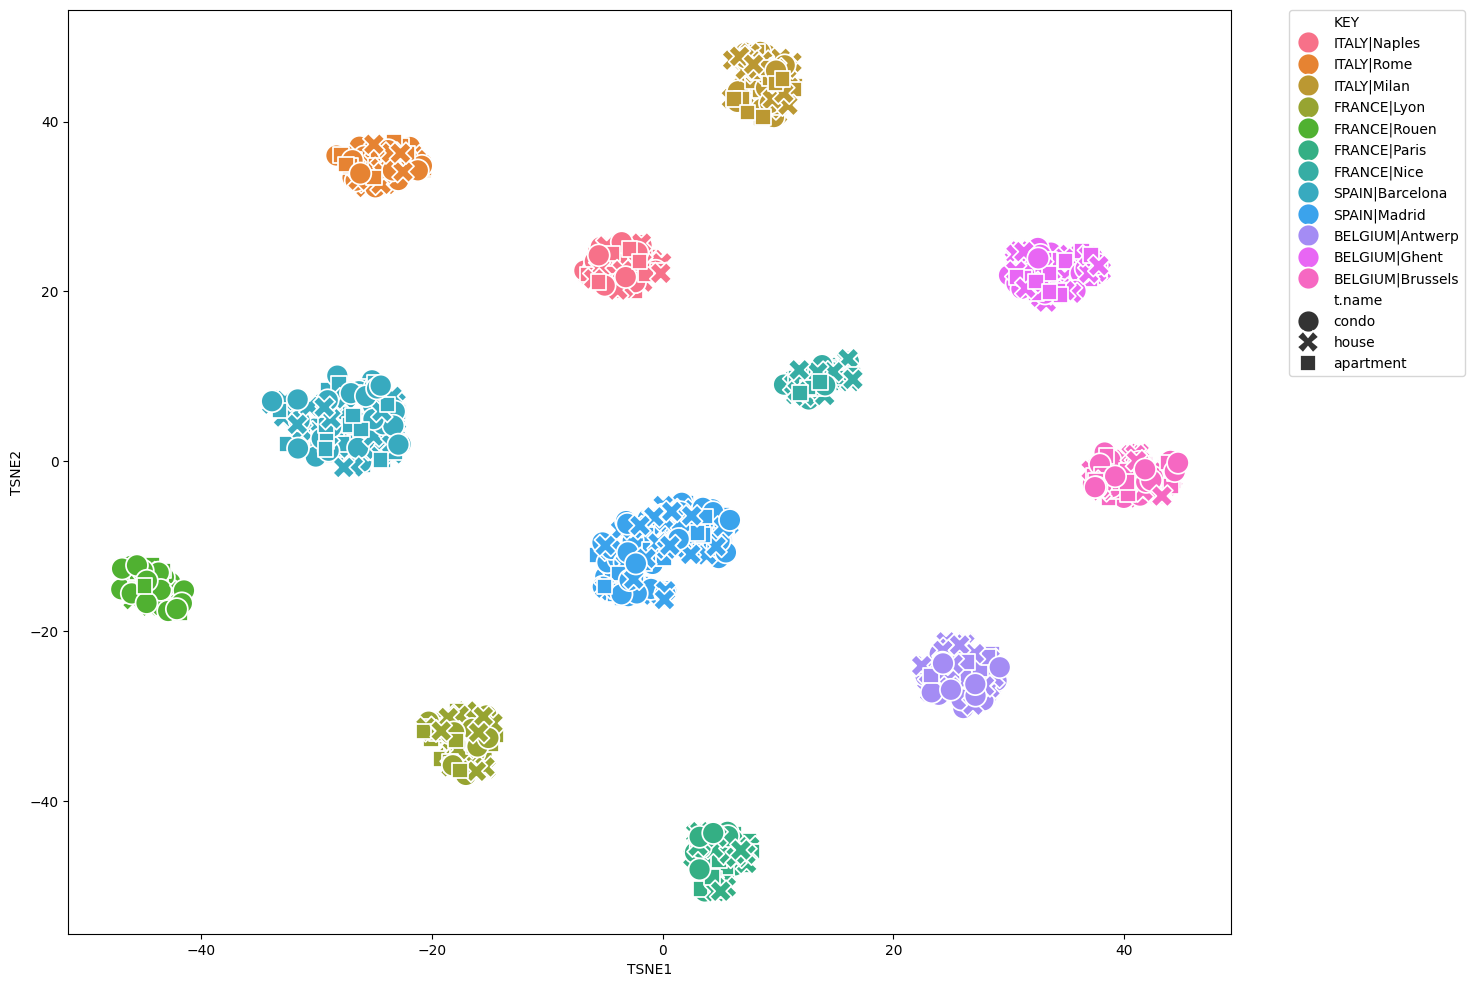

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 12))
sns.scatterplot(data=property_results, x='TSNE1', y='TSNE2', hue='KEY', style='t.name', ax = ax, s = 250)
# ax.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [116]:
# Week Degree Centrality
if 'week-degree' in gds.graph.list().graphName.values:
    gds.graph.drop("week-degree")

gds.graph.project("week-degree",
                  node_spec=["Property", "Week"],
                  relationship_spec={
                      "TRAIN_BOOKING":{"orientation":"REVERSE"}, # Reverse because the gds implementation only looks at outgoing relationships
                  })

gds.degree.write(
    gds.graph.get("week-degree"),
    relationshipTypes=["TRAIN_BOOKING"],
    writeProperty="week_degree"
)

nodePropertiesWritten                                                  1052
writeMillis                                                               3
centralityDistribution    {'min': 0.0, 'max': 508.00195312499994, 'p90':...
postProcessingMillis                                                      5
preProcessingMillis                                                       0
computeMillis                                                             0
configuration             {'writeProperty': 'week_degree', 'orientation'...
Name: 0, dtype: object

<Axes: xlabel='w.week_num'>

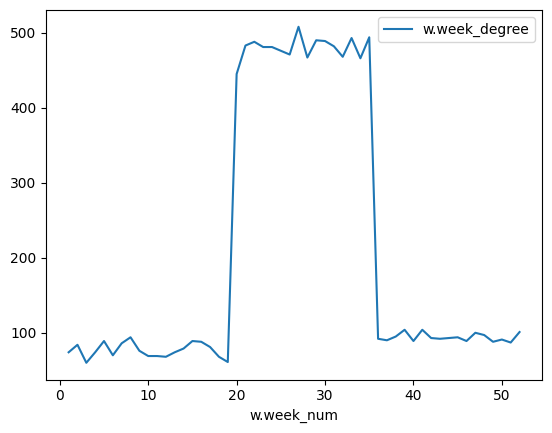

In [117]:
bookings_by_week = gds.run_cypher("""
MATCH(w:Week)
RETURN w.week_num, w.week_degree
""").sort_values("w.week_num")

bookings_by_week.plot(x="w.week_num", y="w.week_degree", kind="line")

In [118]:
# Need to do link prediction within individual queries -- DO THIS ON THE TRAIN DATA ONLY OR THERE WILL BE DATA LEAKAGE
city_week_pref_attachment = gds.run_cypher("""
MATCH (w:Week)<-[:TRAIN_BOOKING]-(p:Property)-[:LOCATED_IN]-> (c:City)
RETURN DISTINCT c.name AS city, w.week_num AS week_num, gds.alpha.linkprediction.preferentialAttachment(c, w) as city_week_pref_attachment
ORDER BY city, week_num
""")

cities = city_week_pref_attachment[['city']].drop_duplicates()
week_nums = pd.DataFrame({"week_num": list(range(1, 53))})

# Fill in missing weeks with the minimum attachment value for that city
city_week_pref_attachment = (
    pd.merge(cities, week_nums, how="cross")
    .merge(city_week_pref_attachment, how="left", on=["city", "week_num"])
    .sort_values(["city", 'week_num'], ascending=True)
    .merge(city_week_pref_attachment.groupby("city", as_index=False).agg(min_week_pref_attach=("city_week_pref_attachment", "min")), on="city", how="left")
    .assign(city_week_pref_attachment=lambda x: np.where(x.city_week_pref_attachment.isna(), x.min_week_pref_attach, x.city_week_pref_attachment))
    .drop(columns=["min_week_pref_attach"])
)

city_week_pref_attachment.to_csv("Inputs/city_week_pref_attachment.csv", index=False)

city_week_pref_attachment

,city,week_num,city_week_pref_attachment
0,Antwerp,1,138610.0
1,Antwerp,2,138610.0
2,Antwerp,3,138610.0
3,Antwerp,4,138610.0
4,Antwerp,5,138610.0
...,...,...,...
567,Rome,48,24480.0
568,Rome,49,23040.0
569,Rome,50,23328.0
570,Rome,51,22032.0


<Axes: xlabel='week_num', ylabel='city_week_pref_attachment'>

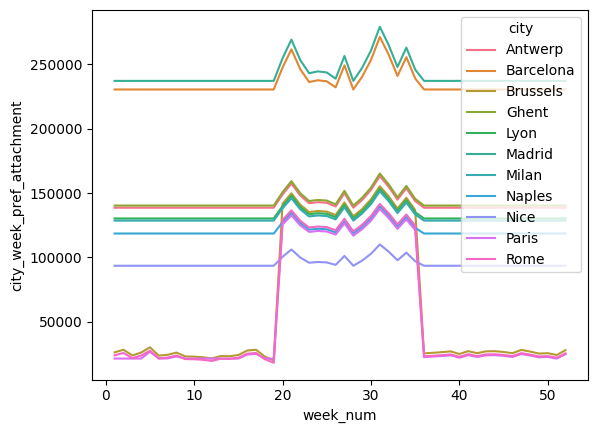

In [119]:
import seaborn as sns
sns.lineplot(data=city_week_pref_attachment, x="week_num", y="city_week_pref_attachment", hue="city")